# Ass 2

##### setup

In [176]:
#%%
import pandas as pd
import os
import numpy as np
import statsmodels
import matplotlib.pyplot as plt
print(os.getcwd())
data = pd.read_csv('dest.csv', 
                header=None, 
                names=['age', 'age2', 'ed',
                       'exper', 'exper2', 'nearc2',
                       'nearc4', 'nearc4a', 'nearc4b',
                       'race', 'smsa', 'south', 'wage'])
print(d.columns.values)

C:\Users\Radim\Documents\GitHub\AdvEcox2
['age' 'age2' 'ed' 'exper' 'exper2' 'nearc2' 'nearc4' 'nearc4a' 'nearc4b'
 'race' 'smsa' 'south' 'wage']


## question 1

In [219]:
#create data
np.random.seed = 1211
rho_list = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
a_list = [1, 0.6, 0.3, 0.15, 0.07, 0.04, 0.02, 0]
N = 100
k = 10
MC = 150
Z = np.random.normal(loc = 0, scale = 1, size =(N,k))
beta_0 = 0
results = np.zeros(MC)
R_freq = np.zeros((11,8))
for a in a_list:
    for rho in rho_list:
        for l in range(MC):
            pi = np.zeros(k)
            pi[0] = a
            sigma = np.array([[1, rho], [rho, 1]])
            eps_v = np.random.multivariate_normal(mean = [0,0], cov = sigma, size = (N))
            eps = eps_v[:,0]
            v = eps_v[:,1]

            X = Z @ pi + v
            Y = X * beta_0 + eps
            Pz = Z @ np.linalg.inv(Z.T @ Z) @ Z.T


            beta_2SLS = (X.T @ Pz @ X) ** (-1) * (X.T @ Pz @ Y)
            residuals = Y - X.T * beta_2SLS
            Shat = np.zeros((10,10))
            for i in range(Z.shape[1]):
                Shat += N ** (-1) * residuals[i] ** 2 * (np.outer(Z[i,], Z[i,]))


            beta_2SLS_var = N * (X.T @ Pz @ X) ** (-1) * \
                            (X.T @ Z @ np.linalg.inv(Z.T @ Z) @ Shat @ np.linalg.inv(Z.T @ Z) @ Z.T @ X) * \
                            (X.T @ Pz @ X) ** (-1)

            tstat = (beta_2SLS - beta_0)/np.sqrt(beta_2SLS_var)
            results[l] = (tstat < -1.96) | (tstat > 1.96)
        R_freq[rho_list.index(rho), a_list.index(a)] = round(np.mean(results),3)
            
            
        
#statsmodels.sandbox.regression.gmm.IV2SLS(endog = Y, exog, instrument=None)[source]



     1.00   0.60   0.30   0.15   0.07   0.04   0.02   0.00
0   0.593  0.653  0.540  0.507  0.547  0.560  0.600  0.580
1   0.587  0.540  0.600  0.513  0.620  0.587  0.553  0.607
2   0.533  0.593  0.587  0.593  0.653  0.667  0.627  0.613
3   0.613  0.640  0.653  0.667  0.700  0.727  0.653  0.773
4   0.613  0.647  0.660  0.733  0.740  0.773  0.773  0.767
5   0.620  0.640  0.740  0.827  0.867  0.860  0.833  0.827
6   0.680  0.687  0.887  0.947  0.927  0.987  0.880  0.940
7   0.613  0.700  0.867  0.973  0.973  0.960  0.973  0.960
8   0.700  0.807  0.953  0.993  0.993  0.993  1.000  1.000
9   0.667  0.867  0.973  1.000  0.993  1.000  1.000  1.000
10  0.680  0.833  0.987  1.000  1.000  1.000  1.000  1.000


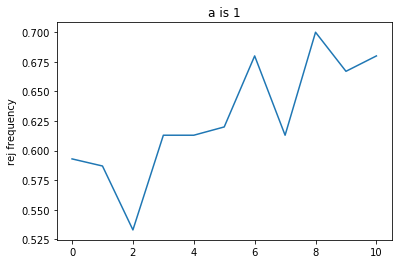

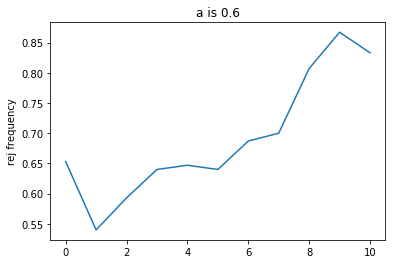

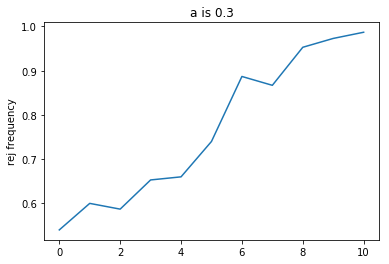

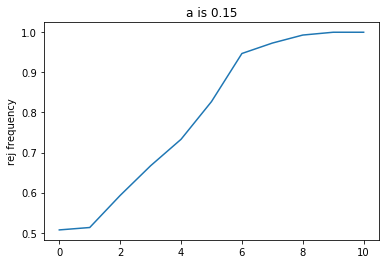

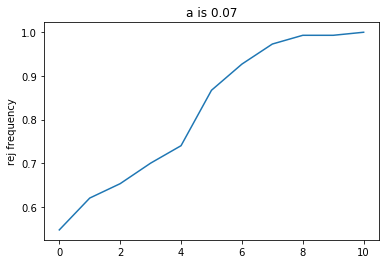

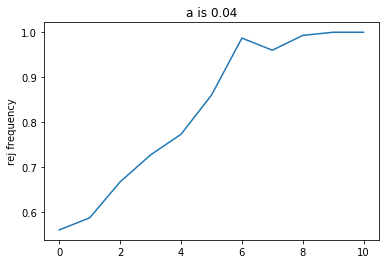

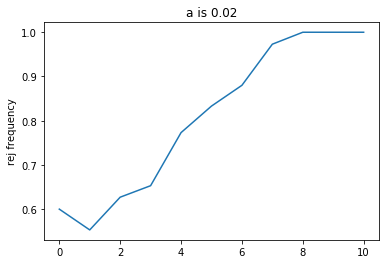

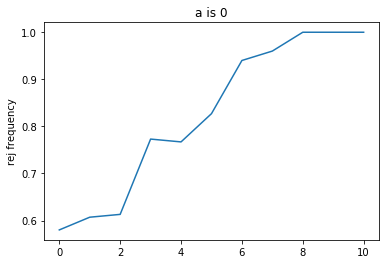

In [220]:
df = pd.DataFrame(R_freq)
df.columns = a_list
#df.rows = rho_list
print(df)


for f in range(8):
    plt.plot(R_freq[:,f])
    plt.ylabel('rej frequency')
    plt.title('a is '+ str(a_list[f]))
    plt.show()

In [212]:
str(a_list[1])

'0.6'

In [82]:
(np.dot(Z,pi)).shape

(100,)

In [ ]:
np.array[]